In [21]:
import random as rnd

class Bandits2():

    p = [.5, .5]
    max_e = 0.0

    def __init__(self, t):
        if t == 1:
            self.p = [rnd.random(), rnd.random()]
        elif t == 2:
            p = rnd.random()
            self.p = [p, 1-p]
        else:
            p = rnd.randrange(0,2)
            if t == 3:
                rp = [.1,.9][p]
                self.p = [rp, 1-rp]
            elif t == 4:
                rp = [.25, .75][p]
                self.p = [rp, 1-rp]
            else:
                rp = [.4, .6][p]
                self.p = [rp,1-rp]

        self.max_e = max(self.p)


    def pull(self,arm):
        if rnd.random() <= self.p[arm]:
            return 1
        else:
            return 0

    def expv_arm(self,arm):
        return self.p[arm]
    
class Bandits11():

    rewards = [1 for i in range(11)]
    max_e = 5.0

    def __init__(self):
        hr = rnd.randrange(0,10)
        self.rewards[hr] = 5
        self.rewards[10] = hr*.1

    def pull(self,arm):
        return self.rewards[arm]

    def expv_arm(self,arm):
        return self.rewards[arm]

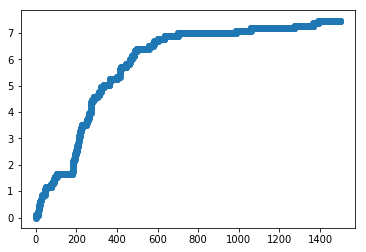

In [26]:
import numpy as np
import matplotlib.pyplot

bandits = Bandits2(2)
nbandits = 2
arm_stats = [[0, 0] for i in range(nbandits)]

trials = 1500
regret = np.zeros(trials)
for i in range(trials):

    # Pick arm
    arm_samples = [np.random.beta(arm_stats[j][0] + 1, arm_stats[j][1] + 1) for j in range(nbandits)]
    pick = np.argmax(arm_samples)
    
    r = bandits.pull(pick)
    if r:
        arm_stats[pick][0] += 1
    else:
        arm_stats[pick][1] += 1

    if i == 0:
        regret[i] = bandits.max_e - bandits.expv_arm(pick)
    else:
        regret[i] = regret[i-1] + bandits.max_e - bandits.expv_arm(pick)

matplotlib.pyplot.scatter(range(len(regret)), regret)
matplotlib.pyplot.show()